In [11]:
#Import dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import os

In [12]:
#Import the csv file
#csv_path = "Resources/US_Accidents_June20_A.csv"
csv_path = 'US_Accidents_June20_A.csv'

In [13]:
#Read csv as df

df = pd.read_csv(csv_path)

In [14]:
#Get total number of accidents

total_accidents = df["ID"].count()

# Extracting ID, Weather Condition and Severity of Accident

wx_df = df[['ID', 'Weather_Condition', 'Severity']]
wx_df = pd.DataFrame(wx_df)
#wx_df = wx_df.fillna(0)


#Group by severity and weather condition to see the number accidents per level of severtiy
wx_group = wx_df.groupby("Severity")["Weather_Condition"]

wx_group_df = pd.DataFrame(wx_group.value_counts())

wx_group_df = wx_group_df.rename(columns={"Weather_Condition": "Number of Accidents"})

#Calculate the number of accidents missing weather data by subtracting the total of t
#in the Number of Accidents Column from the Total Accidents

missing_data = total_accidents - wx_group_df["Number of Accidents"].sum()
missing_percent = round((missing_data / total_accidents) *100, 2)
print(f"There are {missing_data} lines of weather condition data missing")
print(f"This accounts for {missing_percent}% of the total data and is therefore negligble")
wx_group_df

There are 76138 lines of weather condition data missing
This accounts for 2.17% of the total data and is therefore negligble


Number of Accidents
Severity Weather_Condition                                
1        Fair                                        13978
         Mostly Cloudy                                4818
         Cloudy                                       3538
         Partly Cloudy                                2747
         Light Rain                                   1431
...                                                    ...
4        Light Snow with Thunder                         1
         Light Thunderstorms and Snow                    1
         Rain Showers                                    1
         Sand / Dust Whirlwinds                          1
         Squalls                                         1

[363 rows x 1 columns]

In [15]:
#Set variables for total weather conditions and each individual weather condition

total_weather_condition = wx_df["Weather_Condition"].count()
light_rain = wx_df[wx_df["Weather_Condition"] == 'Light Rain']
overcast = wx_df[wx_df["Weather_Condition"] == 'Overcast']
mostly_cloudy = wx_df[wx_df["Weather_Condition"] == 'Mostly Cloudy']
rain = wx_df[wx_df["Weather_Condition"] == 'Rain']
light_snow = wx_df[wx_df["Weather_Condition"] == 'Light Snow']
haze = wx_df[wx_df["Weather_Condition"] == 'Haze']
scattered_clouds = wx_df[wx_df["Weather_Condition"] == 'Scattered Clouds']
partly_cloudy = wx_df[wx_df["Weather_Condition"] == 'Partly Cloudy']
clear = wx_df[wx_df["Weather_Condition"] == 'Clear']
snow = wx_df[wx_df["Weather_Condition"] == 'Snow']
lfd = wx_df[wx_df["Weather_Condition"] == 'Light Freezing Drizzle']
ld = wx_df[wx_df["Weather_Condition"] == 'Light Drizzle']
fog = wx_df[wx_df["Weather_Condition"] == 'Fog']
shallow_fog = wx_df[wx_df["Weather_Condition"] == 'Shallow Fog']
heavy_rain = wx_df[wx_df["Weather_Condition"] == 'Heavy Rain']
lfr = wx_df[wx_df["Weather_Condition"] == 'Light Freezing Rain']
cloudy = wx_df[wx_df["Weather_Condition"] == 'Cloudy']
drizzle = wx_df[wx_df["Weather_Condition"] == 'Drizzle']
lrs = wx_df[wx_df["Weather_Condition"] == 'Light Rain Showers']
mist = wx_df[wx_df["Weather_Condition"] == 'Mist']
smoke = wx_df[wx_df["Weather_Condition"] == 'Smoke']
pof = wx_df[wx_df["Weather_Condition"] == 'Patches of Fog']
lff = wx_df[wx_df["Weather_Condition"] == 'Light Freezing Fog']
light_haze = wx_df[wx_df["Weather_Condition"] == 'Light Haze']
ltr = wx_df[wx_df["Weather_Condition"] == 'Light Thunderstorm and Rain']
hail = wx_df[wx_df["Weather_Condition"] == 'Hail']
sleet = wx_df[wx_df["Weather_Condition"] == 'Sleet']
tornado = wx_df[wx_df["Weather_Condition"] == 'Tornado']
funnel = wx_df[wx_df["Weather_Condition"] == 'Funnel Cloud']
dust = wx_df[wx_df["Weather_Condition"] == 'Dust']
squalls = wx_df[wx_df["Weather_Condition"] == 'Squalls']
windy = wx_df[wx_df["Weather_Condition"] == 'Windy']
thunderstorms = wx_df[wx_df["Weather_Condition"] == 'Thunderstorm']
heavy_rain_showers = wx_df[wx_df["Weather_Condition"] == 'Heavy Rain Showers']
light_ts_rain = wx_df[wx_df["Weather_Condition"] == 'Light Thunderstorms and Rain']
heavy_ts_rain = wx_df[wx_df["Weather_Condition"] == 'Heavy Thunderstorms and Rain']
thunderstorms_rain = wx_df[wx_df["Weather_Condition"] == 'Thunderstorms and Rain']
fair = wx_df[wx_df["Weather_Condition"] == 'Fair']
volcanic_ash = wx_df[wx_df["Weather_Condition"] == 'Volcanic Ash']
blowing_sand = wx_df[wx_df["Weather_Condition"] == 'Blowing Sand']
sand = wx_df[wx_df["Weather_Condition"] == 'Sand']
ice_pellets = wx_df[wx_df["Weather_Condition"] == 'Ice Pellets']
heavy_ice_pellets = wx_df[wx_df["Weather_Condition"] == 'Heavy Ice Pellets']
blowing_snow = wx_df[wx_df["Weather_Condition"] == 'Blowing Snow']
heavy_snow = wx_df[wx_df["Weather_Condition"] == 'Heavy Snow']
heavy_freezing_rain = wx_df[wx_df["Weather_Condition"] == 'Heavy Freezing Rain']
snow_showers = wx_df[wx_df["Weather_Condition"] == 'Snow Showers']
heavy_rain_showers = wx_df[wx_df["Weather_Condition"] == 'Heavy Rain Showers']
snow_sleet = wx_df[wx_df["Weather_Condition"] == 'Snow and Sleet']
sleet = wx_df[wx_df["Weather_Condition"] == 'Sleet']
heavy_sleet = wx_df[wx_df["Weather_Condition"] == 'Heavy Sleet']
light_sleet = wx_df[wx_df["Weather_Condition"] == 'Light Sleet']
heavy_freezing_drizzle = wx_df[wx_df["Weather_Condition"] == 'Heavy Freezing Drizzle']

#Creating a summary table to show the number of accidents for each weather condition

wx_condition_summary = pd.DataFrame({"Total Weather Condition": total_weather_condition,
                               "Light Rain": light_rain.count(),
                               "Overcast": overcast.count(),
                               "Mostly Cloudy": mostly_cloudy.count(),
                               "Rain": rain.count(),
                               "Light Snow": light_snow.count(),
                               "Haze": haze.count(),
                               "Scattered Clouds": scattered_clouds.count(),
                               "Partly Cloudy": partly_cloudy.count(),
                               "Clear Total": clear.count(),
                               "Snow": snow.count(),
                               "Light Freezing Drizzle": lfd.count(),
                               "Light Drizzle": ld.count(),
                               "Fog": fog.count(),
                               "Shallow Fog": shallow_fog.count(),
                               "Heavy Rain": heavy_rain.count(),
                               "Light Freezing Rain": lfr.count(),
                               "Cloudy": cloudy.count(),
                               "Drizzle": drizzle.count(),
                               "Light Rain Showers": lrs.count(),
                               "Mist": mist.count(),
                               "Smoke": smoke.count(),
                               "Patches of Fog": pof.count(),
                               "Light Freezing Fog": lff.count(),
                               "Light Haze": light_haze.count(),
                               "Tornado": tornado.count(),
                               "Funnel": funnel.count(),
                               "Dust": dust.count(),
                               "Squalls": squalls.count(),
                               "Windy": windy.count(),
                               "Thunderstorms": thunderstorms.count(),
                               "Hail": hail.count(),
                               "Sleet": sleet.count(),
                               "Dust": dust.count(),
                               "Squalls": squalls.count(),
                               "Windy": windy.count(),
                               "Thunderstorms": thunderstorms.count(),
                               "Heavy Rain Showers": heavy_rain_showers.count(),
                               "Light Thunderstorms and Rain": light_ts_rain.count(),
                               "Heavy Thunderstorms and Rain": heavy_ts_rain.count(),
                               "Thunderstorms and Rain": thunderstorms_rain.count(),
                               "Fair": fair.count(),
                               "Volcanic Ash": volcanic_ash.count(),
                               "Blowing Sand": blowing_sand.count(),
                               "Sand": sand.count(),
                               "Ice Pellets": ice_pellets.count(),
                               "Heavy Ice Pellets": heavy_ice_pellets.count(),
                               "Blowing Snow": blowing_snow.count(),
                               "Heavy Snow": heavy_snow.count(),
                               "Heavy Freezing Rain": heavy_freezing_rain.count(),
                               "Snow Showers": snow_showers.count(),
                               "Heavy Rain Showers": heavy_rain_showers.count(),
                               "Snow and Sleet": snow_sleet.count(),
                               "Sleet": sleet.count(),
                               "Heavy Sleet": heavy_sleet.count(),
                               "Light Sleet": light_sleet.count(),
                               "Heavy Freezing Drizzle": heavy_freezing_drizzle.count()})
            


#Dropping a few rows    

wx_condition_summary = wx_condition_summary.drop("Severity")
wx_condition_summary = wx_condition_summary.drop("ID")


wx_condition_summary



,Total Weather Condition,Light Rain,Overcast,Mostly Cloudy,Rain,Light Snow,Haze,Scattered Clouds,Partly Cloudy,Clear Total,...,Ice Pellets,Heavy Ice Pellets,Blowing Snow,Heavy Snow,Heavy Freezing Rain,Snow Showers,Snow and Sleet,Heavy Sleet,Light Sleet,Heavy Freezing Drizzle
Weather_Condition,3437479,176942,382485,488094,42016,50435,38699,204660,344815,808202,...,101,4,337,1507,2,2,18,6,19,2


In [16]:
#Create variables of conditions using str.contains. 
#For example all rainy conditions will be grouped into one variable if the Column Name 
#contains "Rain"



rainy_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Rain')].sum()
snowy_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Snow')].sum()
clear_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Clear')].sum()
foggy_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Fog')].sum()
clear_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Clear')].sum()
misty_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Mist')].sum()
cloudy_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Cloud')].sum()
freezing_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Freez')].sum()
smokey_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Smok')].sum()
drizzle_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Drizzle')].sum()
hazy_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Haze')].sum()
thunder_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Thunder')].sum()
overcast_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Overcast')].sum()
dusty_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Dust')].sum()
tornado = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Tornado')].sum()
funnel = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Funnel')].sum()
sandy_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Sand')].sum()
windy_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Wind')].sum()
ash_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Ash')].sum()
fair_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Fair')].sum()
sleet_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Sleet')].sum()
icy_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Ice')].sum()
squall_conditions = wx_condition_summary.loc[:, wx_condition_summary.columns.str.contains('Squalls')].sum()


In [17]:
#Create functions to make various calculations

#Average accidents by condition (using condition variables above)

def accident_condition(condition):
    avg_accident = round((condition / total_accidents) * 100, 2)
    #return avg_accident
    print(avg_accident.map("%{:,.2f}".format))

#Making a value judgment and deciding on the worst conidtions and putting them into a function to calculate
# with total number of non ideal conditions

def non_ideal():
    non_ideal = snowy_conditions.sum() + foggy_conditions.sum() + rainy_conditions.sum() + \
    misty_conditions.sum() + freezing_conditions.sum() + smokey_conditions.sum() + hazy_conditions.sum() + \
    drizzle_conditions.sum() + dusty_conditions.sum() + tornado.sum() + funnel.sum() + \
    sandy_conditions.sum() + windy_conditions.sum() + ash_conditions.sum() + \
    sleet_conditions.sum() + icy_conditions.sum() + thunder_conditions.sum() + \
    squall_conditions.sum()
    return non_ideal

#Function for totalling all cloudy conditions

def cloudy():
    cloudy = cloudy_conditions.sum() + overcast_conditions.sum()
    return cloudy


#Function for totalling clear conditions
def clear_fair():
    clear_fair = clear_conditions.sum() + fair_conditions.sum()
    return clear_fair


# #messing around with putting it into an array
# def non_ideal_1():
#     non_ideal_1 = [snowy_conditions.sum(), foggy_conditions.sum(), rainy_conditions.sum(),
#     misty_conditions.sum(), cloudy_conditions.sum(), freezing_conditions.sum()]
    
#     return non_ideal_1

#Average of the various conditions (using the functions)

def average_condition_total(function):
    percent = round(function / total_accidents * 100, 2)
    print(f"{percent}% of accidents occur in those conditions")



In [18]:
#Example 1 using rainy_conditions
accident_condition(rainy_conditions)

Light Rain                      %5.04
Rain                            %1.20
Heavy Rain                      %0.44
Light Freezing Rain             %0.06
Light Rain Showers              %0.00
Heavy Rain Showers              %0.00
Light Thunderstorms and Rain    %0.14
Heavy Thunderstorms and Rain    %0.07
Thunderstorms and Rain          %0.06
Heavy Freezing Rain             %0.00
dtype: object


## Majority of Accidents occur in Cloudy Conditions

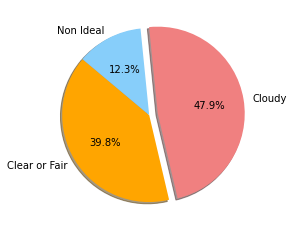

In [19]:
#Create a pie chart to visualize the percentage of accidents in three different weather conditions:
#Clear, Cloudy, Non Ideal

x_labels = ["Clear or Fair", "Cloudy", "Non Ideal"]
y_labels = [clear_fair(), cloudy(), non_ideal()]
explode = [0.0, 0.1, 0]
colors = ["orange", "lightcoral", "lightskyblue"]

plt.pie(y_labels, explode=explode, labels=x_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("Images/wx_breakdown.png")

## Majority of Accidents are of Level 2 Severity

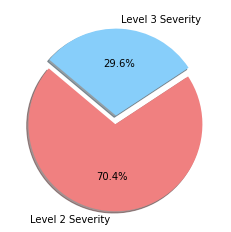

In [20]:
level_1 = wx_df[wx_df["Severity"] == 1]
level_2 = wx_df[wx_df["Severity"] == 2]
level_3 = wx_df[wx_df["Severity"] == 3]
level_4 = wx_df[wx_df["Severity"] == 4]

x_labels_severe = ["Level 2 Severity", "Level 3 Severity"]
y_labels_severe = [level_2["Severity"].count(), level_3["Severity"].count()]
explode_severe = [0.1, 0]
colors_severe = ["lightcoral", "lightskyblue"]

plt.pie(y_labels_severe, explode=explode_severe, labels=x_labels_severe, colors=colors_severe,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.savefig("Images/severity_breakdown.png")